In [7]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
nltk.download()

In [21]:
stemmer_text=nltk.PorterStemmer()
[stemmer_text.stem(w) for w in texto_part_2]

['hi,hello .', 'say my name of nam']

In [11]:
####SPEECH
#*OS tag list:
##
##CC	coordinating conjunction
##CD	cardinal digit
##DT	determiner
##EX	existential there (like: "there is" ... think of it like "there exists")
##FW	foreign word
##IN	preposition/subordinating conjunction
##JJ	adjective	'big'
##JJR	adjective, comparative	'bigger'
##JJS	adjective, superlative	'biggest'
##LS	list marker	1)
##MD	modal	could, will
##NN	noun, singular 'desk'
##NNS	noun plural	'desks'
##NNP	proper noun, singular	'Harrison'
##NNPS	proper noun, plural	'Americans'
##PDT	predeterminer	'all the kids'
##POS	possessive ending	parent\'s
##PRP	personal pronoun	I, he, she
##PRP$	possessive pronoun	my, his, hers
##RB	adverb	very, silently,
##RBR	adverb, comparative	better
##RBS	adverb, superlative	best
##RP	particle	give up
##TO	to	go 'to' the store.
##UH	interjection	errrrrrrrm
##VB	verb, base form	take
##VBD	verb, past tense	took
##VBG	verb, gerund/present participle	taking
##VBN	verb, past participle	taken
##VBP	verb, sing. present, non-3d	take
##VBZ	verb, 3rd person sing. present	takes
##WDT	wh-determiner	which
##WP	wh-pronoun	who, what
##WP$	possessive wh-pronoun	whose
##WRB	wh-abverb	where, when

In [12]:
nltk.pos_tag(texto_part_2)

[('Hi,hello .', 'NNP'), ('say my name of names', 'NNS')]

In [13]:
##Lectura del DATA SET
import numpy as np
import pandas as pd


In [22]:
dataset=pd.read_csv("https://media.githubusercontent.com/media/Diegolivia/FINAL-IA-202102/main/Data/Hotel_Reviews.csv")
dataset.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [24]:
#ver cantidad de datos y columnas RAA
dataset.shape
dataset.isnull().sum()
dataset["Negative_Review"].value_counts()
sia = SentimentIntensityAnalyzer()
dataset["vader_analisis_positive"]=dataset["Positive_Review"].apply(lambda i: sia.polarity_scores(i)['compound'])
dataset.to_csv("Data/Analisis de mensajes positivos.csv")
col_list = ["Positive_Review","vader_analisis_positive"]
new_dataset8= pd.read_csv('Data/Analisis de mensajes positivos.csv', usecols=col_list)

In [25]:
new_dataset8["vader_analisis_positive"].mean()
new_dataset8 = new_dataset8.drop(new_dataset8[new_dataset8['vader_analisis_positive']<=0.50].index)
new_dataset8['Positive_Review']=new_dataset8['Positive_Review'].str.lower()
new_dataset8["vader_analisis_positive"].mean()
new_dataset8['tokenized_sents']= new_dataset8.apply(lambda row: nltk.word_tokenize(row['Positive_Review']), axis=1)
new_dataset8['number']= new_dataset8.apply(lambda row: 1, axis=1)
new_dataset8

,Positive_Review,vader_analisis_positive,tokenized_sents,number
0,only the park outside of the hotel was beauti...,0.5994,"[only, the, park, outside, of, the, hotel, was...",1
1,no real complaints the hotel was great great ...,0.9494,"[no, real, complaints, the, hotel, was, great,...",1
2,location was good and staff were ok it is cut...,0.8720,"[location, was, good, and, staff, were, ok, it...",1
3,great location in nice surroundings the bar a...,0.9260,"[great, location, in, nice, surroundings, the,...",1
4,amazing location and building romantic setting,0.7579,"[amazing, location, and, building, romantic, s...",1
...,...,...,...,...
515714,the nice and friendly staff who were always h...,0.9081,"[the, nice, and, friendly, staff, who, were, a...",1
515715,close to the metro station n super market,0.5994,"[close, to, the, metro, station, n, super, mar...",1
515721,friendly staff comfortable bed good breakfast,0.8555,"[friendly, staff, comfortable, bed, good, brea...",1
515736,the rooms are enormous and really comfortable...,0.5563,"[the, rooms, are, enormous, and, really, comfo...",1


In [26]:
for i in range(336015):
    word_dist = nltk.FreqDist(new_dataset8['tokenized_sents'].values[i])


new_dataset8['dist_tokens']= new_dataset8['Positive_Review'].apply(lambda row : nltk.FreqDist(nltk.word_tokenize(row)))
new_dataset8

#union
new_dataset_comprimido=new_dataset8.groupby('number')['Positive_Review'].apply(' '.join).reset_index()

new_dataset_comprimido

new_dataset_comprimido['Tokenizer_Dist_Positive_Review']= new_dataset_comprimido['Positive_Review'].apply(lambda row : nltk.word_tokenize(row))

porter = nltk.PorterStemmer()
new_dataset_comprimido['Stemmer']= new_dataset_comprimido['Tokenizer_Dist_Positive_Review'].apply(lambda x: [porter.stem(y) for y in x])
new_dataset_comprimido

,number,Positive_Review,Tokenizer_Dist_Positive_Review,Stemmer
0,1,only the park outside of the hotel was beauti...,"[only, the, park, outside, of, the, hotel, was...","[onli, the, park, outsid, of, the, hotel, wa, ..."


In [27]:
from nltk import FreqDist
dist= FreqDist(new_dataset_comprimido['Stemmer'].values[0])

[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


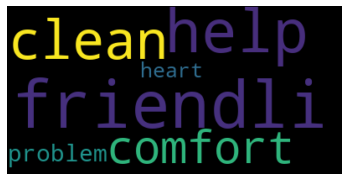

[('the', 440830),
 ('and', 375532),
 ('wa', 209683),
 ('staff', 171366),
 ('veri', 171100),
 ('to', 159078),
 ('room', 154032),
 ('a', 149103),
 ('locat', 148648),
 ('hotel', 113873),
 ('great', 104607),
 ('in', 99925),
 ('good', 94063),
 ('is', 90347),
 ('of', 90186),
 ('were', 82845),
 ('friendli', 81863),
 ('for', 80206),
 ('help', 79405),
 ('breakfast', 72962),
 ('nice', 63577),
 ('clean', 63464),
 ('comfort', 63146),
 ('excel', 62713),
 ('we', 62390),
 ('with', 60531),
 ('bed', 55695),
 ('i', 52995),
 ('it', 52854),
 ('love', 51604),
 ('stay', 41024),
 ('from', 37926),
 ('at', 32072),
 ('on', 31020),
 ('all', 30205),
 ('walk', 29527),
 ('you', 29403),
 ('are', 29354),
 ('our', 29124),
 ('but', 26290),
 ('perfect', 25825),
 ('station', 25567),
 ('realli', 25483),
 ('so', 25084),
 ('had', 24974),
 ('thi', 24628),
 ('close', 24184),
 ('as', 24065),
 ('servic', 23114),
 ('restaur', 23072),
 ('well', 22302),
 ('amaz', 21527),
 ('my', 20043),
 ('bar', 19914),
 ('view', 19599),
 ('everyt

In [29]:
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
nltk.download('webtext')
#wt_words = webtext.words('testing.txt')  # Sample data
#data_analysis = nltk.FreqDist(wt_words)
 
filter_words = dict([(m, n) for m, n in dist.items() if len(m) > 3 and (m == 'friendli' or m == 'help' or m == 'clean' or m == 'problem' or m == 'heart' or m == 'comfort' )])
 
wcloud = WordCloud().generate_from_frequencies(filter_words)
 
# Plotting the wordcloud
plt.imshow(wcloud, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

comunes=dist.most_common(500)
comunes


